In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sport = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
sport.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


Viewing the shape of the DataFrame

In [38]:
sport.shape

(106, 19)

The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier

In [39]:
# Calculate the winning time and runner-up gap
sport['time_overall'] = pd.to_timedelta(sport['time_overall']) # Changed df to sport
sport['time_margin'] = pd.to_timedelta(sport['time_margin'])   # Changed df to sport
sport['Time Gap'] = sport['time_overall'] - sport['time_margin']
print(sport[['time_overall', 'time_margin', 'Time Gap']])

                 time_overall               time_margin  \
0   0 days 00:00:00.000000094 0 days 00:00:00.000000002   
1   0 days 00:00:00.000000096 0 days 00:00:00.000000002   
2                         NaT                       NaT   
3                         NaT                       NaT   
4                         NaT                       NaT   
..                        ...                       ...   
101 0 days 00:00:00.000000084           0 days 00:00:00   
102 0 days 00:00:00.000000089           0 days 00:00:00   
103 0 days 00:00:00.000000086           0 days 00:00:00   
104 0 days 00:00:00.000000083           0 days 00:00:00   
105 0 days 00:00:00.000000082           0 days 00:00:00   

                     Time Gap  
0   0 days 00:00:00.000000092  
1   0 days 00:00:00.000000094  
2                         NaT  
3                         NaT  
4                         NaT  
..                        ...  
101 0 days 00:00:00.000000084  
102 0 days 00:00:00.000000089  
103

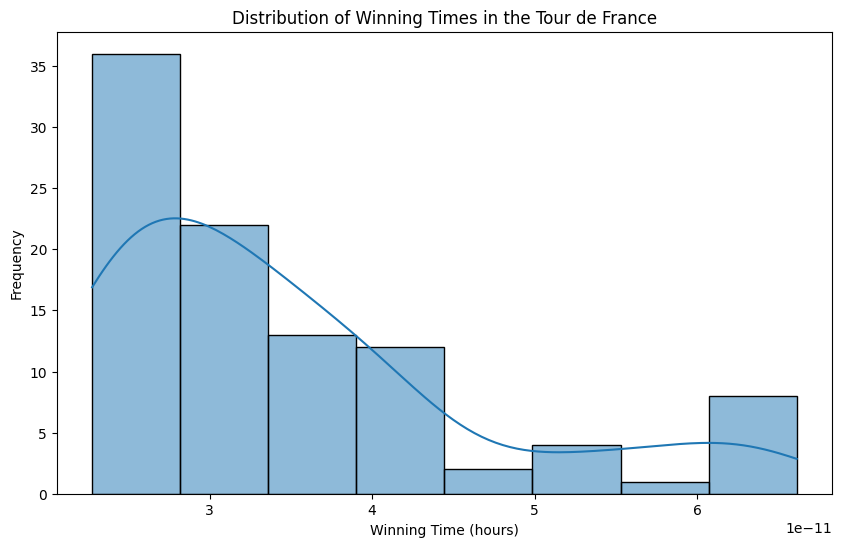

In [40]:
# Plotting the distribution of winning times
plt.figure(figsize=(10, 6))
sns.histplot(sport['time_overall'].dt.total_seconds() / 3600, kde=True)  # Convert to hours for better readability
plt.title('Distribution of Winning Times in the Tour de France')
plt.xlabel('Winning Time (hours)')
plt.ylabel('Frequency')
plt.show()

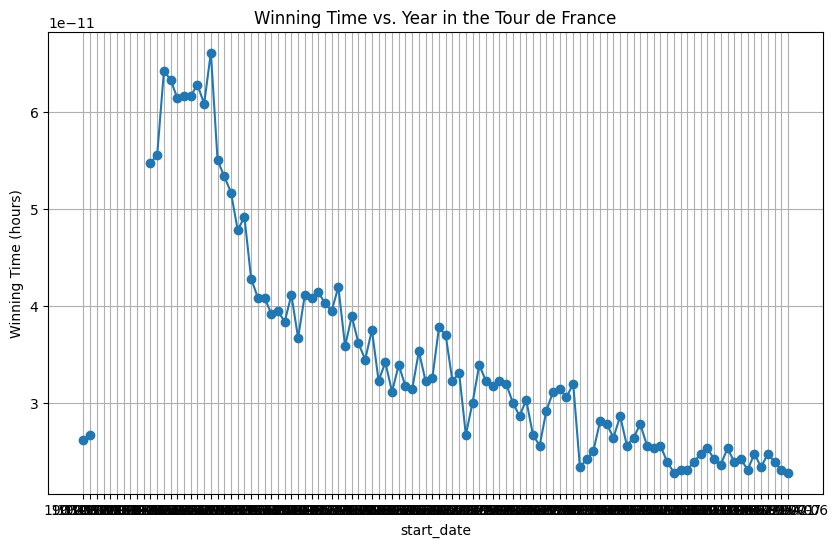

In [ ]:
# Plotting the relationship between winning time and year
plt.figure(figsize=(10, 6))
plt.plot(sport['start_date'], sport['time_overall'].dt.total_seconds() / 3600, marker='o') # Convert to hours
plt.title('Winning Time vs. Year in the Tour de France')
plt.xlabel('start_date')
plt.ylabel('Winning Time (hours)')
plt.grid(True)
plt.show()